# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [9]:
df_test.shape

(14910, 52)

In [22]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Ученая степень', 'Высшее', 'Среднее специальное', 'Неоконченное высшее', 'Среднее', 'Неполное среднее'}


MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Энергетика', 'Маркетинг', 'Металлургия/Промышленность/Машиностроение', 'Государственная служба', 'Страхование', 'Образование', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Туризм', 'Коммунальное хоз-во/Дорожные службы', 'Сельское хозяйство', 'Недвижимость', 'Транспорт', 'Строительство', 'Логистика', 'СМИ/Реклама/PR-агенства', 'Другие сферы', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Здравоохранение', 'Управляющая компания', 'Развлечения/Искусство', 'Подбор персонала', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'Нефтегазовая промышленность', 'Сборочные производства', 'Банк/Финансы', 'Торговля', 'Наука', 'Информационные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [23]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

SyntaxError: invalid syntax (<ipython-input-23-36edb3c47e35>, line 1)

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [16]:
#Да, есть. Строки с пропусками можно удалить, их можно заменить нулями/единицами, также можно усреднить
#Если выборка достаточно большая - думаю, лучше удалить, потому что это не внесет искажения в данные

'grejglwrg\ngwrgwrg'

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
#Да, есть. Категориальные признаки нужно удалить (если их более 7-9), если количество уникальных значений текстовых признаков невелико - 
# их можно разделить на несколько колонок, в которой каждая котонка будет отражать каждый признак, а значение 1 или 0 в наблюдениях
# - истинность данного признака у каждого наблюдения (т.е. только 1 единица на каждый разбитый подобным образом признак и остальные - нули)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [36]:
df_output1 = df.copy()
df_output1 = df_output1[~df_output1['GEN_INDUSTRY'].isnull()]
df_output1.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test


In [62]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK','WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED',\
                               'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE',\
                               'TP_PROVINCE','REGION_NM'],axis = 1)
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output = df_output[~df_output['GEN_INDUSTRY'].isnull()]
    df_output = df_output[~df_output['GEN_TITLE'].isnull()]
    df_output = df_output[~df_output['ORG_TP_STATE'].isnull()]
    df_output = df_output[~df_output['ORG_TP_FCAPITAL'].isnull()]
    df_output = df_output[~df_output['JOB_DIR'].isnull()]
    df_output = pd.get_dummies(data=df_output, columns=['EDUCATION', 'MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE',\
                                            'ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME'])
    ## Your Code Here
    
    return df_output

In [63]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [70]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13855 entries, 14910 to 30132
Columns: 113 entries, TARGET to FAMILY_INCOME_свыше 50000 руб.
dtypes: float64(5), int64(31), uint8(77)
memory usage: 4.9 MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [84]:
X = df_train_preproc.drop(['TARGET'],axis=1)
X_test = df_test_preproc.drop(['TARGET'],axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [85]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here

X_train, X_pretest, y_train, y_pretest = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
print(X_train.info())
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9698 entries, 15207 to 22902
Columns: 112 entries, AGE to FAMILY_INCOME_свыше 50000 руб.
dtypes: float64(5), int64(30), uint8(77)
memory usage: 3.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13855 entries, 14910 to 30132
Columns: 112 entries, AGE to FAMILY_INCOME_свыше 50000 руб.
dtypes: float64(5), int64(30), uint8(77)
memory usage: 4.8 MB


In [89]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()

dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
lr.fit(X_train, y_train)

predict_dtc = dtc.predict(X_pretest)
predict_rfc = rfc.predict(X_pretest)
predict_lr = lr.predict(X_pretest)

predict_proba_dtc = dtc.predict_proba(X_pretest)
predict_proba_rfc = rfc.predict_proba(X_pretest)
predict_proba_lr = lr.predict_proba(X_pretest)

In [90]:
predict_proba_rfc

array([[0.8, 0.2],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [1. , 0. ],
       [0.9, 0.1],
       [0.7, 0.3]])

In [96]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('accuracy', accuracy_score(y_pretest, predict_dtc))
print('precision', precision_score(y_pretest, predict_dtc))
print('recall', recall_score(y_pretest, predict_dtc))

print('accuracy', accuracy_score(y_pretest, predict_rfc))
print('precision', precision_score(y_pretest, predict_rfc))
print('recall', recall_score(y_pretest, predict_rfc))

print('accuracy', accuracy_score(y_pretest, predict_lr))
print('precision', precision_score(y_pretest, predict_lr))
print('recall', recall_score(y_pretest, predict_lr))

pure_result = pd.DataFrame(
    [
        ['DecisionTreeClassifier', accuracy_score(y_pretest, predict_dtc), precision_score(y_pretest, predict_dtc), recall_score(y_pretest, predict_dtc)],
        ['RandomForestClassifier', accuracy_score(y_pretest, predict_rfc), precision_score(y_pretest, predict_rfc), recall_score(y_pretest, predict_rfc)],
        ['LogisticRegression', accuracy_score(y_pretest, predict_lr), precision_score(y_pretest, predict_lr), recall_score(y_pretest, predict_lr)]
    ],
    columns=['model', 'accuracy', 'precision', 'recall']
)
pure_result

accuracy 0.7707481356747654
precision 0.1536
recall 0.18461538461538463
accuracy 0.8744286745248978
precision 0.4444444444444444
recall 0.015384615384615385
accuracy 0.8744286745248978
precision 0.0
recall 0.0


,model,accuracy,precision,recall
0,DecisionTreeClassifier,0.770748,0.153600,0.184615
1,RandomForestClassifier,0.874429,0.444444,0.015385
2,LogisticRegression,0.874429,0.000000,0.000000


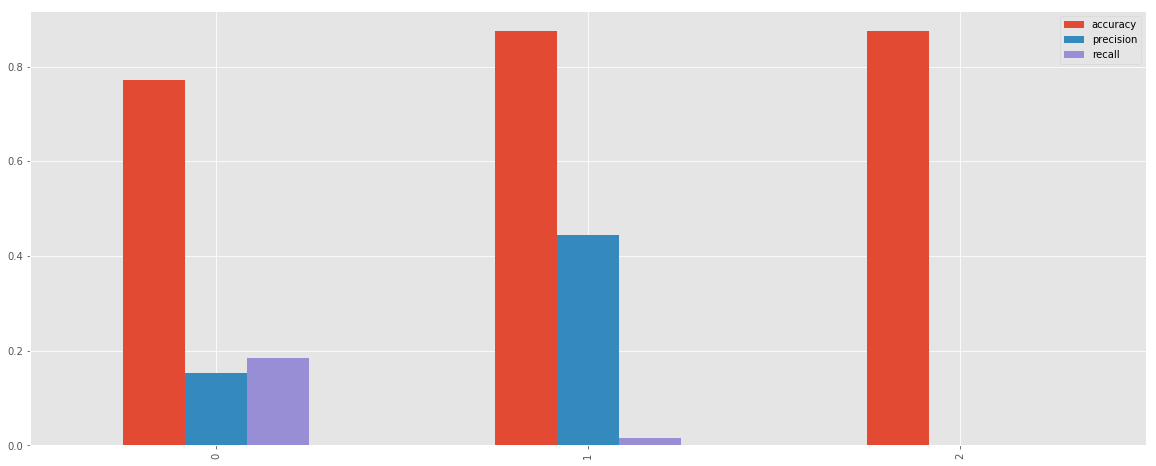

In [99]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
_, ax = plt.subplots(figsize=(20,8))
pure_result.plot(
    kind='bar', ax=ax)
plt.show()

DecisionTreeClassifier 0.5195829191429961
RandomForestClassifier 0.5692461030858061
LogisticRegression 0.5804340009729066


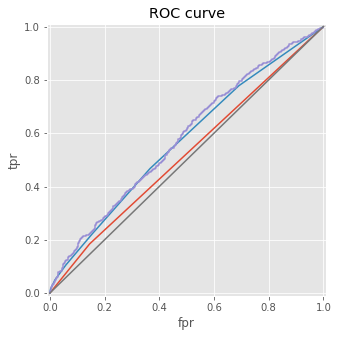

In [121]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_pretest, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_pretest, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_pretest, predict_proba_lr[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('DecisionTreeClassifier', roc_auc_score(y_pretest, predict_proba_dtc[:,1]))
print('RandomForestClassifier', roc_auc_score(y_pretest, predict_proba_rfc[:,1]))
print('LogisticRegression', roc_auc_score(y_pretest, predict_proba_lr[:,1]))

In [127]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
print('dtc', cross_val_score(dtc,X,y,scoring = 'roc_auc', cv = 10))
print('rfc', cross_val_score(rfc,X,y,scoring = 'roc_auc', cv = 10))
print('lr', cross_val_score(lr,X,y,scoring = 'roc_auc', cv = 10))

dtc [0.52690153 0.54164215 0.52040289 0.50334142 0.52410896 0.52209518
 0.50490638 0.50614708 0.51776214 0.52024353]
rfc [0.57161601 0.58201195 0.60390918 0.57280388 0.58007886 0.58330984
 0.53132989 0.57799459 0.55885076 0.61865789]
lr [0.62837466 0.62201989 0.65074192 0.62054948 0.62061527 0.55968964
 0.60213174 0.62957741 0.58231822 0.62398959]


In [128]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
predict_proba_lr_final = lr.predict_proba(X_test)

In [130]:
# Померить roc_auc на тесте
print('Chosen blackbox roc_auc', roc_auc_score(y_test, predict_proba_lr_final[:,1]))

Chosen blackbox roc_auc 0.5918048584321374


In [ ]:
#Дико извиняюсь за позднюю сдачу первых двух заданий (была нелегкая жизненная ситуация, но она преодолена :D)
#Третье ДЗ сдам к концу недели, и, надеюсь, четвертое.
#Очень надеюсь на проверку заданий.
#Если честно возникло два вопроса (постараюсь задать их перед занятием, но продублирую тут, если не получится)
#1) Почему линейная регресия при нулевых recall и precision показывает лучший результат на probability roc_auc?
#2) Не использовал StratifiedKFold. Наверное, это ошибка, помню, что это было на очном занятии, 
#но на видео и на раздатках ничего подобного нет, поэтому не использовал

#P.S. Большое спасибо за курс!!!